# Single Layer MNIST

This notebook will construct a one layer neural network for classifying MNIST images. I will try to use the vector approach in classifying the images.

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [23]:
input_len = 784
output_len = 10
x = tf.placeholder(tf.float32, [None,input_len]) # 784 is number of pixels in each image

W = tf.Variable(tf.zeros([input_len,output_len]))
b = tf.Variable(tf.zeros([output_len]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

# correct answers
y_ = tf.placeholder(tf.float32, [None, output_len])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("accuracy",accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

accuracy 0.9198


(100, 784)
(100, 10)


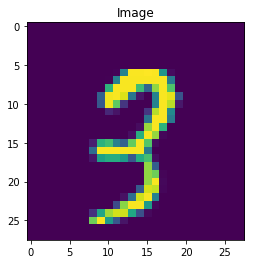

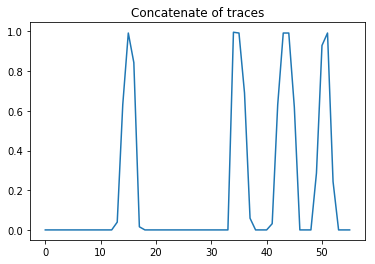

In [24]:
batch_xs,batch_ys = mnist.train.next_batch(100)
print(batch_xs.shape)
print(batch_ys.shape)

ind = np.random.randint(100)
image = batch_xs[ind].reshape(28,28)
plt.figure(1)
plt.imshow(image)
plt.title("Image")

def vector_proc(image):
    len_x = image.shape[0]
    len_y = image.shape[1]
    
    vec_x = image[int(len_x/2),:]
    vec_y = image[:,int(len_y/2)]
    return np.concatenate((vec_x,vec_y))
vec = vector_proc(image)
plt.figure(2)
plt.plot(vec)
plt.title("Concatenate of traces")

## Vector Learning

Instead of sending in the full image to the NN, I will attempt to send in traces along the image and see how learning is affected.

In [46]:
def vector_proc(inp):
    # handle list of input and a single input case
    if(len(inp.shape) > 1):
        out = []
        for i in inp:
            image = i.reshape(28,28)
            len_x = image.shape[0]
            len_y = image.shape[1]

            vec_x = image[int(len_x/2),:]
            vec_y = image[:,int(len_y/2)]
            out += [np.concatenate((vec_x,vec_y))]
        return np.array(out)
    else:
        image = inp.reshape(28,28)
        len_x = image.shape[0]
        len_y = image.shape[1]

        vec_x = image[int(len_x/2),:]
        vec_y = image[:,int(len_y/2)]
        return np.concatenate((vec_x,vec_y))
        
for i in range(-6,5):
    print(i)
    input_len = 28*2
    output_len = 10
    x = tf.placeholder(tf.float32, [None,input_len]) 

    W = tf.Variable(tf.zeros([input_len,output_len]))
    b = tf.Variable(tf.zeros([output_len]))

    y = tf.nn.softmax(tf.matmul(x, W) + b)

    # correct answers
    y_ = tf.placeholder(tf.float32, [None, output_len])
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
    #train_step = tf.train.GradientDescentOptimizer(10**i).minimize(cross_entropy)
    train_step = tf.train.AdamOptimizer(learning_rate=10**i).minimize(cross_entropy)

    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()

    for _ in range(100000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: vector_proc(batch_xs), y_: batch_ys})

    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("accuracy",accuracy.eval(feed_dict={x: vector_proc(mnist.test.images), y_: mnist.test.labels}))

-6
accuracy 0.6344
-5
accuracy 0.7015
-4
accuracy 0.726
-3
accuracy 0.7288
-2
accuracy 0.098
-1
accuracy 0.098
0
accuracy 0.098
1
accuracy 0.098
2
accuracy 0.098
3
accuracy 0.098
4
accuracy 0.098
